# Exploratory Data Analysis for the Zooplankton Dataset

In [56]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [50]:
# File and folder locations
SRC_MASTER_CSV = r"C:\Users\Welcome\Documents\MScAC\STA2453\Project\CodeRepo\STA2453-Zooplankton\data\merged_csv\combined_lakes.csv"
DEST_TIFF_FOLDER = r"C:\Users\Welcome\Documents\MScAC\STA2453\Project\CodeRepo\STA2453-Zooplankton\data\combined_pics"

# Load Master CSV File
master_df = pd.read_csv(SRC_MASTER_CSV)
master_df['proc_tiff_file'] = master_df['csv_filepath'].astype(str) + "_" + master_df['Particle.ID'].astype(str) + ".tif"




In [51]:
# Filter out rows which do not have a corresponding demosaiced tif file
full_tiff_set = set(f for f in os.listdir(DEST_TIFF_FOLDER) if f.endswith((".tif", ".tiff")))

# Vectorized approach using .isin()
master_df['proc_image_exists'] = master_df['proc_tiff_file'].isin(full_tiff_set)


In [54]:
master_df[['proc_image_exists','lake']].value_counts()
#master_df['csv_filepath'].astype(str) + "_" + master_df['Particle.ID'].astype(str) + ".tif"

proc_image_exists  lake  
True               Huron     1001471
False              Simcoe     993391
True               Simcoe     246187
False              Huron       50206
Name: count, dtype: int64

In [55]:
filtered_df = master_df[master_df['proc_image_exists'] == True]

## Numerical Features
EDA on the numerical features

            Class  Instances
0       Bosmina_1       5114
2      Calanoid_1     120301
4      Chironomid       2055
5      Chydoridae        157
10    Cyclopoid_1      48456
11        Daphnia        118
15  Herpacticoida       1351


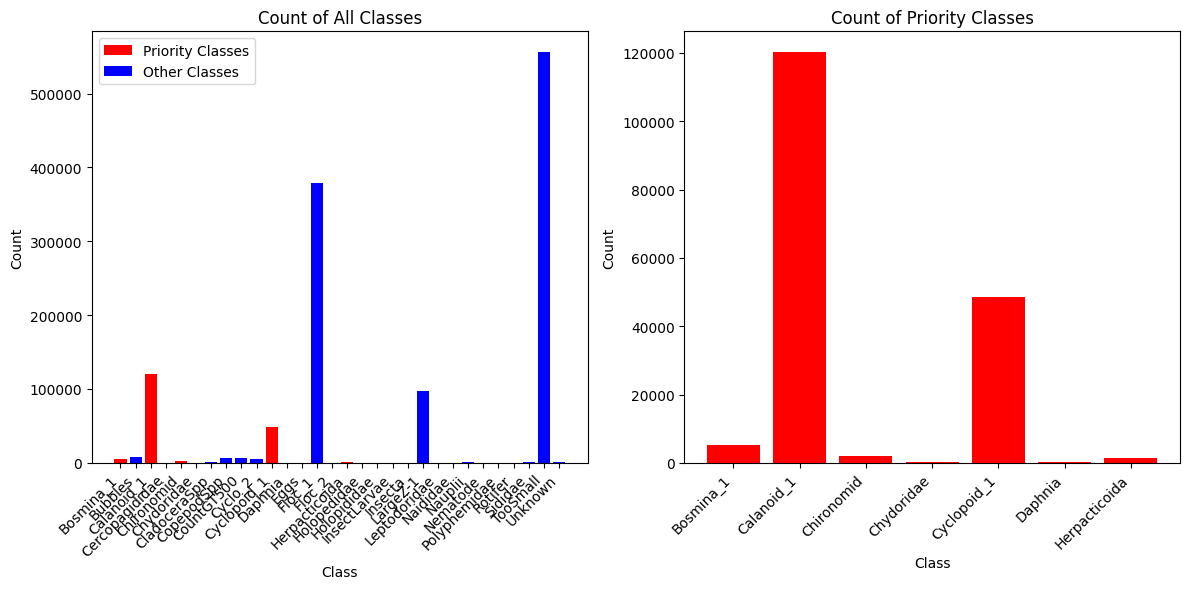

In [ ]:
# Define priority classes and colors
all_classes = filtered_df.groupby('Class', as_index = False).aggregate(Instances = ('Class.Particle.ID','count'))
priority_classes = ['Calanoid_1', 'Cyclopoid_1', 'Bosmina_1', 'Herpacticoida', 'Chydoridae', 'Chironomid', 'Daphnia']
colors = ['red' if c in priority_classes else 'blue' for c in all_classes['Class']]


# Build Figure
plt.figure(figsize=(12,6))
# First subplot - all classes
plt.subplot(1,2,1)
plt.bar(all_classes['Class'], all_classes['Instances'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Count of All Classes')
plt.xlabel('Class')
plt.ylabel('Count')
priority_patch = plt.Rectangle((0,0), 1, 1, fc='red', label='Priority Classes')
other_patch = plt.Rectangle((0,0), 1, 1, fc='blue', label='Other Classes')
plt.legend(handles=[priority_patch, other_patch])
plt.tight_layout()

# Second subplot - priority classes only
plt.subplot(1,2,2)
priority_df = all_classes[all_classes['Class'].isin(priority_classes)]
plt.bar(priority_df['Class'], priority_df['Instances'], color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Priority Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

Clearly we have some serious unbalanced issues with data points

In [ ]:


plt.figure(figsize=(20, 16))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()